In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import mpl
import matplotlib

%matplotlib inline

sns.set_style('darkgrid')
mpl.rcParams['figure.figsize'] = (8, 5)

In [2]:
data = pd.read_csv("data_output2.csv",index_col=0)

## 1. 预处理

In [6]:
data.groupby("dti")["dti"].count()

dti
(-1.0, 5.0]      23973
(10.0, 16.0]    133196
(16.0, 21.0]    139500
(21.0, 27.0]    110801
(27.0, 32.0]     73115
(32.0, 38.0]     36789
(38.0, 43.0]      8377
(43.0, 49.0]      1217
(49.0, 54.0]      1684
(5.0, 10.0]      83130
Name: dti, dtype: int64

In [7]:
data.dtypes

term             object
grade          category
purpose          object
loan_status      object
annual_inc       object
dti              object
pub_rec          object
revol_util       object
dtype: object

In [8]:
# grade 数据类型转换
from pandas.api.types import CategoricalDtype
data['grade'] = data['grade'].astype(CategoricalDtype(ordered=True))# 将 grade 列设置为有序分类数据
data.grade.head()

0    C
1    C
2    B
4    F
5    C
Name: grade, dtype: category
Categories (7, object): ['A' < 'B' < 'C' < 'D' < 'E' < 'F' < 'G']

In [9]:
data.groupby('grade').grade.count()

grade
A    117025
B    173213
C    174804
D     86041
E     42915
F     13437
G      4347
Name: grade, dtype: int64

In [10]:
annual_inc_dtype = CategoricalDtype(categories=['(-300.0, 30000.0]', '(30000.0, 60000.0]', '(60000.0, 90000.0]', '(90000.0, 119900.0]',
       '(119900.0, 149900.0]', '(149900.0, 179900.0]', '(179900.0, 209900.0]',  '(209900.0, 239900.0]', '(239900.0, 269900.0]', '(269900.0, 299800.0]'], ordered=True)
data['annual_inc'] = data['annual_inc'].astype(annual_inc_dtype)
data['annual_inc'].head()

0     (30000.0, 60000.0]
1     (60000.0, 90000.0]
2     (60000.0, 90000.0]
4    (90000.0, 119900.0]
5     (30000.0, 60000.0]
Name: annual_inc, dtype: category
Categories (10, object): ['(-300.0, 30000.0]' < '(30000.0, 60000.0]' < '(60000.0, 90000.0]' < '(90000.0, 119900.0]' ... '(179900.0, 209900.0]' < '(209900.0, 239900.0]' < '(239900.0, 269900.0]' < '(269900.0, 299800.0]']

In [11]:
data.dtypes

term             object
grade          category
purpose          object
loan_status      object
annual_inc     category
dti              object
pub_rec          object
revol_util       object
dtype: object

In [12]:
data.head()

,term,grade,purpose,loan_status,annual_inc,dti,pub_rec,revol_util
0,36 months,C,debt_consolidation,Fully Paid,"(30000.0, 60000.0]","(5.0, 10.0]","(-0.002, 0.9]","(19.0, 39.0]"
1,36 months,C,small_business,Fully Paid,"(60000.0, 90000.0]","(16.0, 21.0]","(-0.002, 0.9]","(-0.0, 19.0]"
2,60 months,B,home_improvement,Fully Paid,"(60000.0, 90000.0]","(10.0, 16.0]","(-0.002, 0.9]","(39.0, 58.0]"
4,60 months,F,major_purchase,Fully Paid,"(90000.0, 119900.0]","(21.0, 27.0]","(-0.002, 0.9]","(58.0, 77.0]"
5,36 months,C,debt_consolidation,Fully Paid,"(30000.0, 60000.0]","(10.0, 16.0]","(-0.002, 0.9]","(58.0, 77.0]"


In [13]:
data['term'] = data['term'].astype(CategoricalDtype(ordered=True))# 将 grade 列设置为有序分类数据
data.term.head()

0     36 months
1     36 months
2     60 months
4     60 months
5     36 months
Name: term, dtype: category
Categories (2, object): [' 36 months' < ' 60 months']

In [11]:
data.info

<bound method DataFrame.info of                term grade             purpose  loan_status  \
0         36 months     C  debt_consolidation   Fully Paid   
1         36 months     C      small_business   Fully Paid   
2         60 months     B    home_improvement   Fully Paid   
4         60 months     F      major_purchase   Fully Paid   
5         36 months     C  debt_consolidation   Fully Paid   
...             ...   ...                 ...          ...   
1048570   36 months     D         credit_card  Charged Off   
1048571   36 months     B  debt_consolidation   Fully Paid   
1048572   36 months     B  debt_consolidation   Fully Paid   
1048573   36 months     A  debt_consolidation   Fully Paid   
1048574   36 months     A    home_improvement   Fully Paid   

                   annual_inc           dti        pub_rec    revol_util  
0          (30000.0, 60000.0]   (5.0, 10.0]  (-0.002, 0.9]  (19.0, 39.0]  
1          (60000.0, 90000.0]  (16.0, 21.0]  (-0.002, 0.9]  (-0.0, 19.0] 

In [14]:
dti_dtype = CategoricalDtype(categories=['(-1.0, 5.0]', '(5.0, 10.0]', '(10.0, 16.0]', '(16.0, 21.0]',
       '(21.0, 27.0]', '(27.0, 32.0]', '(32.0, 38.0]', '(38.0, 43.0]', '(43.0, 49.0]', '(49.0, 54.0]'], ordered=True)
data['dti'] = data['dti'].astype(dti_dtype)

In [15]:
data.groupby("dti")["dti"].count()

dti
(-1.0, 5.0]      23973
(5.0, 10.0]      83130
(10.0, 16.0]    133196
(16.0, 21.0]    139500
(21.0, 27.0]    110801
(27.0, 32.0]     73115
(32.0, 38.0]     36789
(38.0, 43.0]      8377
(43.0, 49.0]      1217
(49.0, 54.0]      1684
Name: dti, dtype: int64

In [16]:
data.dtypes

term           category
grade          category
purpose          object
loan_status      object
annual_inc     category
dti            category
pub_rec          object
revol_util       object
dtype: object

In [17]:
data.head()

,term,grade,purpose,loan_status,annual_inc,dti,pub_rec,revol_util
0,36 months,C,debt_consolidation,Fully Paid,"(30000.0, 60000.0]","(5.0, 10.0]","(-0.002, 0.9]","(19.0, 39.0]"
1,36 months,C,small_business,Fully Paid,"(60000.0, 90000.0]","(16.0, 21.0]","(-0.002, 0.9]","(-0.0, 19.0]"
2,60 months,B,home_improvement,Fully Paid,"(60000.0, 90000.0]","(10.0, 16.0]","(-0.002, 0.9]","(39.0, 58.0]"
4,60 months,F,major_purchase,Fully Paid,"(90000.0, 119900.0]","(21.0, 27.0]","(-0.002, 0.9]","(58.0, 77.0]"
5,36 months,C,debt_consolidation,Fully Paid,"(30000.0, 60000.0]","(10.0, 16.0]","(-0.002, 0.9]","(58.0, 77.0]"


In [18]:
data['purpose'] = data['purpose'].astype(CategoricalDtype(ordered=False))# 将 grade 列设置为有序分类数据
data.purpose.head()

0    debt_consolidation
1        small_business
2      home_improvement
4        major_purchase
5    debt_consolidation
Name: purpose, dtype: category
Categories (14, object): ['car', 'credit_card', 'debt_consolidation', 'educational', ..., 'renewable_energy', 'small_business', 'vacation', 'wedding']

In [19]:
data.pub_rec.unique()

array(['(-0.002, 0.9]', '(0.9, 1.9]', '(1.9, 2.2]'], dtype=object)

In [20]:
pub_rec_dtype = CategoricalDtype(categories=['(-0.002, 0.9]', '(0.9, 1.9]', '(1.9, 2.2]'], ordered=True)
data['pub_rec'] = data['pub_rec'].astype(pub_rec_dtype)

In [21]:
data.revol_util.unique()

array(['(19.0, 39.0]', '(-0.0, 19.0]', '(39.0, 58.0]', '(58.0, 77.0]',
       '(77.0, 96.0]', '(96.0, 116.0]', '(116.0, 193.0]'], dtype=object)

In [22]:
revol_util_dtype = CategoricalDtype(categories=['(-0.0, 19.0]','(19.0, 39.0]', '(39.0, 58.0]', '(58.0, 77.0]',
       '(77.0, 96.0]', '(96.0, 116.0]', '(116.0, 193.0]'], ordered=True)
data['revol_util'] = data['revol_util'].astype(revol_util_dtype)

In [23]:
data.dtypes

term           category
grade          category
purpose        category
loan_status      object
annual_inc     category
dti            category
pub_rec        category
revol_util     category
dtype: object

In [24]:
## 输出数据类型转换后的table
data_classification = data
data_classification

,term,grade,purpose,loan_status,annual_inc,dti,pub_rec,revol_util
0,36 months,C,debt_consolidation,Fully Paid,"(30000.0, 60000.0]","(5.0, 10.0]","(-0.002, 0.9]","(19.0, 39.0]"
1,36 months,C,small_business,Fully Paid,"(60000.0, 90000.0]","(16.0, 21.0]","(-0.002, 0.9]","(-0.0, 19.0]"
2,60 months,B,home_improvement,Fully Paid,"(60000.0, 90000.0]","(10.0, 16.0]","(-0.002, 0.9]","(39.0, 58.0]"
4,60 months,F,major_purchase,Fully Paid,"(90000.0, 119900.0]","(21.0, 27.0]","(-0.002, 0.9]","(58.0, 77.0]"
5,36 months,C,debt_consolidation,Fully Paid,"(30000.0, 60000.0]","(10.0, 16.0]","(-0.002, 0.9]","(58.0, 77.0]"
...,...,...,...,...,...,...,...,...
1048570,36 months,D,credit_card,Charged Off,"(30000.0, 60000.0]","(32.0, 38.0]","(-0.002, 0.9]","(58.0, 77.0]"
1048571,36 months,B,debt_consolidation,Fully Paid,"(119900.0, 149900.0]","(21.0, 27.0]","(-0.002, 0.9]","(58.0, 77.0]"
1048572,36 months,B,debt_consolidation,Fully Paid,"(60000.0, 90000.0]","(21.0, 27.0]","(-0.002, 0.9]","(39.0, 58.0]"
1048573,36 months,A,debt_consolidation,Fully Paid,"(30000.0, 60000.0]","(21.0, 27.0]","(-0.002, 0.9]","(19.0, 39.0]"


# 2. 特征工程

### 2.1 WoE编码转换

In [25]:
# 统计样本中好坏数据的数量
data.groupby('loan_status').loan_status.count()

loan_status
Charged Off    129187
Fully Paid     482595
Name: loan_status, dtype: int64

In [26]:
data_labeled = data.copy()

In [27]:
data_labeled.head()

,term,grade,purpose,loan_status,annual_inc,dti,pub_rec,revol_util
0,36 months,C,debt_consolidation,Fully Paid,"(30000.0, 60000.0]","(5.0, 10.0]","(-0.002, 0.9]","(19.0, 39.0]"
1,36 months,C,small_business,Fully Paid,"(60000.0, 90000.0]","(16.0, 21.0]","(-0.002, 0.9]","(-0.0, 19.0]"
2,60 months,B,home_improvement,Fully Paid,"(60000.0, 90000.0]","(10.0, 16.0]","(-0.002, 0.9]","(39.0, 58.0]"
4,60 months,F,major_purchase,Fully Paid,"(90000.0, 119900.0]","(21.0, 27.0]","(-0.002, 0.9]","(58.0, 77.0]"
5,36 months,C,debt_consolidation,Fully Paid,"(30000.0, 60000.0]","(10.0, 16.0]","(-0.002, 0.9]","(58.0, 77.0]"


In [28]:
ng, nb = 482595, 129187
ng

482595

In [29]:
def cross_column(col: str, data_df):
    """
    将data_df中col列的数据分类汇总，并根据 loan_status 列行程交叉表
    param col：代表列名的字符串
    param data_df：原始数据表，DataFrame类型
    """
    table = data_df.groupby(col).apply(lambda df: df.groupby('loan_status').count())[col].unstack()
    table['column'] = table.index.name
    return table

cross_column('term', data_labeled)

loan_status,Charged Off,Fully Paid,column
term,,,
36 months,77925,388626,term
60 months,51262,93969,term


In [30]:
# 对所有列数据进行循环，并将每列数据的形成的交叉表合成为 gouped_table
grouped_table = pd.concat([cross_column(col, data_labeled) for col in data_labeled if col != 'loan_status'])
grouped_table.head(10)

loan_status,Charged Off,Fully Paid,column
36 months,77925.0,388626.0,term
60 months,51262.0,93969.0,term
A,7193.0,109832.0,grade
B,24619.0,148594.0,grade
C,41679.0,133125.0,grade
D,28598.0,57443.0,grade
E,18009.0,24906.0,grade
F,6755.0,6682.0,grade
G,2334.0,2013.0,grade
car,963.0,5070.0,purpose


In [31]:
# 重置grouped_table的索引为整数索引，原分组数据保存在group列中
grouped_table = grouped_table.reset_index().rename({'index': 'group'}, axis=1)
grouped_table

loan_status,group,Charged Off,Fully Paid,column
0,36 months,77925.0,388626.0,term
1,60 months,51262.0,93969.0,term
2,A,7193.0,109832.0,grade
3,B,24619.0,148594.0,grade
4,C,41679.0,133125.0,grade
5,D,28598.0,57443.0,grade
6,E,18009.0,24906.0,grade
7,F,6755.0,6682.0,grade
8,G,2334.0,2013.0,grade
9,car,963.0,5070.0,purpose


In [32]:
# 计算 WoE 
grouped_table['WoE'] = np.log((grouped_table['Fully Paid']/ng) / (grouped_table['Charged Off']/nb))
grouped_table

loan_status,group,Charged Off,Fully Paid,column,WoE
0,36 months,77925.0,388626.0,term,0.288954
1,60 months,51262.0,93969.0,term,-0.711902
2,A,7193.0,109832.0,grade,1.407927
3,B,24619.0,148594.0,grade,0.479782
4,C,41679.0,133125.0,grade,-0.156626
5,D,28598.0,57443.0,grade,-0.620460
6,E,18009.0,24906.0,grade,-0.993680
7,F,6755.0,6682.0,grade,-1.328782
8,G,2334.0,2013.0,grade,-1.465874
9,car,963.0,5070.0,purpose,0.343126


In [33]:
# #标记需要合并的数据，将需要合并的行的merge_mark标1
grouped_table['merge_mark'] = np.where(grouped_table.WoE.isna(), 0, 1)
grouped_table

loan_status,group,Charged Off,Fully Paid,column,WoE,merge_mark
0,36 months,77925.0,388626.0,term,0.288954,1
1,60 months,51262.0,93969.0,term,-0.711902,1
2,A,7193.0,109832.0,grade,1.407927,1
3,B,24619.0,148594.0,grade,0.479782,1
4,C,41679.0,133125.0,grade,-0.156626,1
5,D,28598.0,57443.0,grade,-0.620460,1
6,E,18009.0,24906.0,grade,-0.993680,1
7,F,6755.0,6682.0,grade,-1.328782,1
8,G,2334.0,2013.0,grade,-1.465874,1
9,car,963.0,5070.0,purpose,0.343126,1


In [34]:
# 观察需要合并的分组
grouped_table[grouped_table.merge_mark == 0]
# 对数据表进行深拷贝
woe_filled = grouped_table.copy()

### 2.2 合并WoE近似的数据组

In [35]:
woe_filled.head()

loan_status,group,Charged Off,Fully Paid,column,WoE,merge_mark
0,36 months,77925.0,388626.0,term,0.288954,1
1,60 months,51262.0,93969.0,term,-0.711902,1
2,A,7193.0,109832.0,grade,1.407927,1
3,B,24619.0,148594.0,grade,0.479782,1
4,C,41679.0,133125.0,grade,-0.156626,1


In [36]:
def order_df(df, sort_col):
    """
    根据特征变量属于有序特征或无序特征对df进行排序，对于无序变量，根据分组内部的样本数量对分组进行排序；
    对有序变量，根据数据的索引顺序（与分组的顺序相同）对分组进行排序
    param df: 需要排序的数据表
    param col: 对于无序数据，作为排序标准的列名称
    return：返回根据排序规则排序后的数据表
    """
    unordered_cols = ['home_ownership', 'purpose', 'addr_state']
    df_copy = df.copy()
    col = df_copy['column'].iloc[0]

    if col in unordered_cols:
        return df_copy.sort_values(sort_col, ascending=False)
    else:
        return df_copy.sort_index()

In [37]:
def get_woe_diff(df):
    """
    判断传入df中column列对应值的类别，如果是无序数据则根据WoE值对数据进行排序，如果有有序值则根据索引进行排序，
    对排序以后的数据进行WoE差分，并将结果加入数据表的WoE_diff列，返回带有WoE_diff的数据表。此函数将作为groupby
    方法的回调函数使用
    param df：DataFrame数据，其中column列应该具有唯一值
    return：DataFrame数据，返回经过排序并计算出WoE_diff的数据表
    """
    df_ordered = order_df(df, 'WoE')
    df_ordered['WoE_diff'] = df_ordered.WoE.diff()
    return df_ordered

In [38]:
# 测试 get_woe_diff() 函数
tmp_df = woe_filled[woe_filled.column == 'dti']
get_woe_diff(tmp_df)

loan_status,group,Charged Off,Fully Paid,column,WoE,merge_mark,WoE_diff
33,"(-1.0, 5.0]",3760.0,20213.0,dti,0.363990,1,NaN
34,"(5.0, 10.0]",12926.0,70204.0,dti,0.374248,1,0.010257
35,"(10.0, 16.0]",23261.0,109935.0,dti,0.235194,1,-0.139053
36,"(16.0, 21.0]",28177.0,111323.0,dti,0.056013,1,-0.179181
37,"(21.0, 27.0]",26134.0,84667.0,dti,-0.142428,1,-0.198441
38,"(27.0, 32.0]",19994.0,53121.0,dti,-0.340777,1,-0.198349
39,"(32.0, 38.0]",11382.0,25407.0,dti,-0.514925,1,-0.174149
40,"(38.0, 43.0]",2663.0,5714.0,dti,-0.554451,1,-0.039526
41,"(43.0, 49.0]",412.0,805.0,dti,-0.648098,1,-0.093647
42,"(49.0, 54.0]",478.0,1206.0,dti,-0.392463,1,0.255635


In [39]:
# 计算WoE差值，对于有序数据，按照索引顺序排序后计算WoE差值；对于无序数据，按照WoE排序后计算WoE差值
WoE_diff_table = woe_filled.groupby('column', group_keys=False, sort=False).apply(get_woe_diff)
WoE_diff_table

loan_status,group,Charged Off,Fully Paid,column,WoE,merge_mark,WoE_diff
0,36 months,77925.0,388626.0,term,0.288954,1,NaN
1,60 months,51262.0,93969.0,term,-0.711902,1,-1.000855
2,A,7193.0,109832.0,grade,1.407927,1,NaN
3,B,24619.0,148594.0,grade,0.479782,1,-0.928144
4,C,41679.0,133125.0,grade,-0.156626,1,-0.636408
5,D,28598.0,57443.0,grade,-0.620460,1,-0.463835
6,E,18009.0,24906.0,grade,-0.993680,1,-0.373219
7,F,6755.0,6682.0,grade,-1.328782,1,-0.335103
8,G,2334.0,2013.0,grade,-1.465874,1,-0.137092
9,car,963.0,5070.0,purpose,0.343126,1,NaN


In [40]:
# 计算WoE分组标记
tmp = WoE_diff_table.copy()
tmp['merge_mark'] = np.where(tmp.WoE_diff.abs() < 0.1, 0, 1)
tmp['merge_group'] = tmp.merge_mark.cumsum()
tmp

loan_status,group,Charged Off,Fully Paid,column,WoE,merge_mark,WoE_diff,merge_group
0,36 months,77925.0,388626.0,term,0.288954,1,NaN,1
1,60 months,51262.0,93969.0,term,-0.711902,1,-1.000855,2
2,A,7193.0,109832.0,grade,1.407927,1,NaN,3
3,B,24619.0,148594.0,grade,0.479782,1,-0.928144,4
4,C,41679.0,133125.0,grade,-0.156626,1,-0.636408,5
5,D,28598.0,57443.0,grade,-0.620460,1,-0.463835,6
6,E,18009.0,24906.0,grade,-0.993680,1,-0.373219,7
7,F,6755.0,6682.0,grade,-1.328782,1,-0.335103,8
8,G,2334.0,2013.0,grade,-1.465874,1,-0.137092,9
9,car,963.0,5070.0,purpose,0.343126,1,NaN,10


In [41]:
def merge_group(df):
    """
    作为回调函数使用，合并df中 merge_group 列相同的行的数据，返回数据合并以后的结果
    param df: 包含 merge_group 分组的数据
    return：返回数据合并以后的数据
    """
    if len(df) == 1:    # 如果分组中只有一条数据，即不需要合并，返回传入的数据
        return df
    else:
        data = {'group': get_group(df.group),
                'Charged Off': df['Charged Off'].sum(),
                'Fully Paid': df['Fully Paid'].sum(),
                'column': df.column.iloc[0],                   
               }
        s = pd.DataFrame(data, index=[df.index[0]])
        s['WoE'] = np.log((s['Fully Paid']/ng) / (s['Charged Off']/nb))
        return s

In [42]:
# 测试merge_group()函数
test_df = tmp[tmp.merge_group ==32]
merge_group(test_df)

loan_status,group,Charged Off,Fully Paid,column,WoE,merge_mark,WoE_diff,merge_group
52,"(116.0, 193.0]",29.0,65.0,revol_util,-0.510825,1,-0.27339,32


In [43]:
def merge_similar_woe(df):
    """
    合并df数据表中WoE值相近的行（相近的标准是WoE差值的绝对值小于0.1）
    param df：原始数据表，包含['group', 'column', 'Charged Off', 'Fully Paid', 'WoE']五列数据
    return：返回合并后的数据表
    """
    WoE_diff_table = df.groupby('column', group_keys=False, sort=True).apply(get_woe_diff)
    WoE_diff_table['merge_mark'] = np.where(WoE_diff_table.WoE_diff.abs() < 0.1, 0, 1)
    columns = WoE_diff_table.columns

    WoE_diff_table['merge_group'] = WoE_diff_table.merge_mark.cumsum()
    result = WoE_diff_table.groupby('merge_group', group_keys=False, sort=True).apply(merge_group)

    WoE_diff_table = result.groupby('column', group_keys=False, sort=True).apply(get_woe_diff)
    WoE_diff_table['merge_mark'] = np.where(WoE_diff_table.WoE_diff.abs() < 0.1, 0, 1)
    return WoE_diff_table.loc[:, columns]

In [44]:
def get_group(s):
    """
    根据传入的Series数据计算合并分组以后的分组值
    param s: 需要合并的分组标签组成的 Series
    return：返回合并以后的分组标签
    """
    if type(s.iloc[0]) == pd._libs.interval.Interval:
        group = merge_interval(s)
    else:
        group = '/'.join(s.astype(str))
    return group

In [45]:
# 测试merge_similar_woe函数
tmp = merge_similar_woe(woe_filled)
tmp

loan_status,group,Charged Off,Fully Paid,column,WoE,merge_mark,WoE_diff
23,"(-300.0, 30000.0]",9288.0,27274.0,annual_inc,-0.240706,1,NaN
24,"(30000.0, 60000.0]",51567.0,168033.0,annual_inc,-0.136638,1,0.104068
25,"(60000.0, 90000.0]",39710.0,148971.0,annual_inc,0.004232,1,0.140870
26,"(90000.0, 119900.0]/(119900.0, 149900.0]/(1499...",27888.0,133289.0,annual_inc,0.246406,1,0.242175
32,"(269900.0, 299800.0]",734.0,5028.0,annual_inc,0.606352,1,0.359945
33,"(-1.0, 5.0]/(5.0, 10.0]",16686.0,90417.0,dti,0.371945,1,NaN
35,"(10.0, 16.0]",23261.0,109935.0,dti,0.235194,1,-0.136751
36,"(16.0, 21.0]",28177.0,111323.0,dti,0.056013,1,-0.179181
37,"(21.0, 27.0]",26134.0,84667.0,dti,-0.142428,1,-0.198441
38,"(27.0, 32.0]",19994.0,53121.0,dti,-0.340777,1,-0.198349


In [46]:
while True:
    tmp = merge_similar_woe(tmp)
    count = tmp.merge_mark[tmp.merge_mark == 0].count()
    if count == 0:
        break

In [47]:
woe_merged = tmp.copy()
woe_merged

loan_status,group,Charged Off,Fully Paid,column,WoE,merge_mark,WoE_diff
23,"(-300.0, 30000.0]",9288.0,27274.0,annual_inc,-0.240706,1,NaN
24,"(30000.0, 60000.0]",51567.0,168033.0,annual_inc,-0.136638,1,0.104068
25,"(60000.0, 90000.0]",39710.0,148971.0,annual_inc,0.004232,1,0.140870
26,"(90000.0, 119900.0]/(119900.0, 149900.0]/(1499...",27888.0,133289.0,annual_inc,0.246406,1,0.242175
32,"(269900.0, 299800.0]",734.0,5028.0,annual_inc,0.606352,1,0.359945
33,"(-1.0, 5.0]/(5.0, 10.0]",16686.0,90417.0,dti,0.371945,1,NaN
35,"(10.0, 16.0]",23261.0,109935.0,dti,0.235194,1,-0.136751
36,"(16.0, 21.0]",28177.0,111323.0,dti,0.056013,1,-0.179181
37,"(21.0, 27.0]",26134.0,84667.0,dti,-0.142428,1,-0.198441
38,"(27.0, 32.0]",19994.0,53121.0,dti,-0.340777,1,-0.198349


In [48]:
woe_merged[woe_merged.merge_mark == 0]

loan_status,group,Charged Off,Fully Paid,column,WoE,merge_mark,WoE_diff


### 2.3 IV及特征筛选

In [53]:
iv_df = woe_merged.loc[:, ['column', 'group', 'Charged Off', 'Fully Paid', 'WoE']]
iv_df.head()

loan_status,column,group,Charged Off,Fully Paid,WoE
23,annual_inc,"(-300.0, 30000.0]",9288.0,27274.0,-0.240706
24,annual_inc,"(30000.0, 60000.0]",51567.0,168033.0,-0.136638
25,annual_inc,"(60000.0, 90000.0]",39710.0,148971.0,0.004232
26,annual_inc,"(90000.0, 119900.0]/(119900.0, 149900.0]/(1499...",27888.0,133289.0,0.246406
32,annual_inc,"(269900.0, 299800.0]",734.0,5028.0,0.606352


In [54]:
# 计算分组IV
iv_df['IV'] = (iv_df['Fully Paid']/ng - iv_df['Charged Off']/nb) * iv_df['WoE']
iv_df.head()

loan_status,column,group,Charged Off,Fully Paid,WoE,IV
23,annual_inc,"(-300.0, 30000.0]",9288.0,27274.0,-0.240706,0.003702
24,annual_inc,"(30000.0, 60000.0]",51567.0,168033.0,-0.136638,0.006966
25,annual_inc,"(60000.0, 90000.0]",39710.0,148971.0,0.004232,0.000006
26,annual_inc,"(90000.0, 119900.0]/(119900.0, 149900.0]/(1499...",27888.0,133289.0,0.246406,0.014863
32,annual_inc,"(269900.0, 299800.0]",734.0,5028.0,0.606352,0.002872


In [55]:
# 计算变量的 IV
iv = iv_df.groupby('column').IV.sum()
iv

column
annual_inc    0.028409
dti           0.077156
grade         0.527843
pub_rec       0.006201
purpose       0.018066
revol_util    0.024145
term          0.202261
Name: IV, dtype: float64

In [56]:
# 筛选IV值大于0.02的
selected_features = iv[iv > 0.02].index
selected_features

Index(['annual_inc', 'dti', 'grade', 'revol_util', 'term'], dtype='object', name='column')

In [57]:
data_original = pd.read_csv("loan_selection_2007-2018_new.csv")

In [58]:
# 筛选出的特征值
features =data_original.loc[:, selected_features]
features.head()

column,annual_inc,dti,grade,revol_util,term
0,55000.0,5.91,C,29.7,36 months
1,65000.0,16.06,C,19.2,36 months
2,63000.0,10.78,B,56.2,60 months
3,104433.0,25.37,F,64.5,60 months
4,34000.0,10.20,C,68.4,36 months


In [59]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611782 entries, 0 to 611781
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   annual_inc  611782 non-null  float64
 1   dti         611564 non-null  float64
 2   grade       611782 non-null  object 
 3   revol_util  611456 non-null  float64
 4   term        611782 non-null  object 
dtypes: float64(3), object(2)
memory usage: 23.3+ MB


In [60]:
# 使用 revol_util 列的均值对空值进行填充
features.revol_util.fillna(features.revol_util.mean(), inplace=True)
features.dti.fillna(features.dti.mean(), inplace=True)

In [61]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611782 entries, 0 to 611781
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   annual_inc  611782 non-null  float64
 1   dti         611782 non-null  float64
 2   grade       611782 non-null  object 
 3   revol_util  611782 non-null  float64
 4   term        611782 non-null  object 
dtypes: float64(3), object(2)
memory usage: 23.3+ MB


#### 2.4.2. 生成原始数据到WoE的映射表

In [62]:
# 获取特征变量的分组映射字典
group_map = woe_merged[woe_merged.column.isin(selected_features)].loc[:, ['group', 'column', 'WoE']]
group_map.set_index('column', inplace=True)
group_map

loan_status,group,WoE
column,,
annual_inc,"(-300.0, 30000.0]",-0.240706
annual_inc,"(30000.0, 60000.0]",-0.136638
annual_inc,"(60000.0, 90000.0]",0.004232
annual_inc,"(90000.0, 119900.0]/(119900.0, 149900.0]/(1499...",0.246406
annual_inc,"(269900.0, 299800.0]",0.606352
dti,"(-1.0, 5.0]/(5.0, 10.0]",0.371945
dti,"(10.0, 16.0]",0.235194
dti,"(16.0, 21.0]",0.056013
dti,"(21.0, 27.0]",-0.142428


In [63]:
def process_obj_feature_map(df):
    """
    处理非interval类型的特征映射关系，将合并的特征标签展开为单独的特征值
    param df：DataFrame类型，索引为特征值的名称，两列数据分别为group和WoE值
    return：对group标签存在合并的情况，将合并的标签展开为单独的特征值，WoE值与合并的WoE值相同
    """
    result = []
    for idx, (group, woe) in df.iterrows():
        label_list = str(group).split('/')
        for label in label_list:
            result.append((idx, label, woe))
    return pd.DataFrame(result, columns=['column', 'group', 'WoE']).set_index('column')

In [64]:
# 测试process_obj_feature_map()函数
tmp = group_map.loc['dti']
process_obj_feature_map(tmp)

,group,WoE
column,,
dti,"(-1.0, 5.0]",0.371945
dti,"(5.0, 10.0]",0.371945
dti,"(10.0, 16.0]",0.235194
dti,"(16.0, 21.0]",0.056013
dti,"(21.0, 27.0]",-0.142428
dti,"(27.0, 32.0]",-0.340777
dti,"(32.0, 38.0]",-0.525675
dti,"(38.0, 43.0]",-0.525675
dti,"(43.0, 49.0]",-0.525675


In [65]:
# 生成原始数据到WoE值得映射表
modified_group_map = []

for f in features:
    feature_map = group_map.loc[f]
    if type(feature_map.group.iloc[0]) == pd._libs.interval.Interval:
        modified_group_map.append(modify_interval(feature_map))
    else:
        modified_group_map.append(process_obj_feature_map(feature_map))
        
modified_group_map = pd.concat(modified_group_map)
modified_group_map

,group,WoE
column,,
annual_inc,"(-300.0, 30000.0]",-0.240706
annual_inc,"(30000.0, 60000.0]",-0.136638
annual_inc,"(60000.0, 90000.0]",0.004232
annual_inc,"(90000.0, 119900.0]",0.246406
annual_inc,"(119900.0, 149900.0]",0.246406
annual_inc,"(149900.0, 179900.0]",0.246406
annual_inc,"(179900.0, 209900.0]",0.246406
annual_inc,"(209900.0, 239900.0]",0.246406
annual_inc,"(239900.0, 269900.0]",0.246406


In [66]:
modified_group_map = modified_group_map.set_index('group', append=True).loc[:, 'WoE']
modified_group_map

column      group               
annual_inc  (-300.0, 30000.0]      -0.240706
            (30000.0, 60000.0]     -0.136638
            (60000.0, 90000.0]      0.004232
            (90000.0, 119900.0]     0.246406
            (119900.0, 149900.0]    0.246406
            (149900.0, 179900.0]    0.246406
            (179900.0, 209900.0]    0.246406
            (209900.0, 239900.0]    0.246406
            (239900.0, 269900.0]    0.246406
            (269900.0, 299800.0]    0.606352
dti         (-1.0, 5.0]             0.371945
            (5.0, 10.0]             0.371945
            (10.0, 16.0]            0.235194
            (16.0, 21.0]            0.056013
            (21.0, 27.0]           -0.142428
            (27.0, 32.0]           -0.340777
            (32.0, 38.0]           -0.525675
            (38.0, 43.0]           -0.525675
            (43.0, 49.0]           -0.525675
            (49.0, 54.0]           -0.392463
grade       A                       1.407927
            B         

In [67]:
SY_Table = modified_group_map

In [62]:
# modified_group_map = modified_group_map.reset_index(level=0, drop=True)

In [68]:
modified_group_map

column      group               
annual_inc  (-300.0, 30000.0]      -0.240706
            (30000.0, 60000.0]     -0.136638
            (60000.0, 90000.0]      0.004232
            (90000.0, 119900.0]     0.246406
            (119900.0, 149900.0]    0.246406
            (149900.0, 179900.0]    0.246406
            (179900.0, 209900.0]    0.246406
            (209900.0, 239900.0]    0.246406
            (239900.0, 269900.0]    0.246406
            (269900.0, 299800.0]    0.606352
dti         (-1.0, 5.0]             0.371945
            (5.0, 10.0]             0.371945
            (10.0, 16.0]            0.235194
            (16.0, 21.0]            0.056013
            (21.0, 27.0]           -0.142428
            (27.0, 32.0]           -0.340777
            (32.0, 38.0]           -0.525675
            (38.0, 43.0]           -0.525675
            (43.0, 49.0]           -0.525675
            (49.0, 54.0]           -0.392463
grade       A                       1.407927
            B         

In [64]:
# data_x = pd.read_csv("data_output2.csv",index_col=0)

In [65]:
# data_x.dtypes

In [66]:
# data.term.replace(['36 months','60 months'],[-0.118403,-1.119258])

In [69]:
DF_table = modified_group_map.reset_index()

In [70]:
DF_table

,column,group,WoE
0,annual_inc,"(-300.0, 30000.0]",-0.240706
1,annual_inc,"(30000.0, 60000.0]",-0.136638
2,annual_inc,"(60000.0, 90000.0]",0.004232
3,annual_inc,"(90000.0, 119900.0]",0.246406
4,annual_inc,"(119900.0, 149900.0]",0.246406
5,annual_inc,"(149900.0, 179900.0]",0.246406
6,annual_inc,"(179900.0, 209900.0]",0.246406
7,annual_inc,"(209900.0, 239900.0]",0.246406
8,annual_inc,"(239900.0, 269900.0]",0.246406
9,annual_inc,"(269900.0, 299800.0]",0.606352


In [73]:
A1=DF_table.group.to_list()
A2=DF_table.WoE.to_list()

In [76]:
data.head()

,term,grade,purpose,loan_status,annual_inc,dti,pub_rec,revol_util
0,36 months,C,debt_consolidation,Fully Paid,"(30000.0, 60000.0]","(5.0, 10.0]","(-0.002, 0.9]","(19.0, 39.0]"
1,36 months,C,small_business,Fully Paid,"(60000.0, 90000.0]","(16.0, 21.0]","(-0.002, 0.9]","(-0.0, 19.0]"
2,60 months,B,home_improvement,Fully Paid,"(60000.0, 90000.0]","(10.0, 16.0]","(-0.002, 0.9]","(39.0, 58.0]"
4,60 months,F,major_purchase,Fully Paid,"(90000.0, 119900.0]","(21.0, 27.0]","(-0.002, 0.9]","(58.0, 77.0]"
5,36 months,C,debt_consolidation,Fully Paid,"(30000.0, 60000.0]","(10.0, 16.0]","(-0.002, 0.9]","(58.0, 77.0]"


In [77]:
# 存储woe 全表（筛选特征后）
data_woe_full = data.replace(A1,A2)

In [78]:
data_woe_full.head()

,term,grade,purpose,loan_status,annual_inc,dti,pub_rec,revol_util
0,0.288954,-0.156626,debt_consolidation,Fully Paid,-0.136638,0.371945,"(-0.002, 0.9]",0.151130
1,0.288954,-0.156626,small_business,Fully Paid,0.004232,0.056013,"(-0.002, 0.9]",0.347444
2,-0.711902,0.479782,home_improvement,Fully Paid,0.004232,0.235194,"(-0.002, 0.9]",-0.099165
4,-0.711902,-1.328782,major_purchase,Fully Paid,0.246406,-0.142428,"(-0.002, 0.9]",-0.099165
5,0.288954,-0.156626,debt_consolidation,Fully Paid,-0.136638,0.235194,"(-0.002, 0.9]",-0.099165


In [79]:
data_woe_full.dropna(inplace=True)

In [80]:
data_woe_full.isnull().sum()

term           0
grade          0
purpose        0
loan_status    0
annual_inc     0
dti            0
pub_rec        0
revol_util     0
dtype: int64

## 3 . 分析特征相关性

In [81]:
data_predictors = data_woe_full.loc[:, selected_features]

In [83]:
data_predictors

column,annual_inc,dti,grade,revol_util,term
0,-0.136638,0.371945,-0.156626,0.151130,0.288954
1,0.004232,0.056013,-0.156626,0.347444,0.288954
2,0.004232,0.235194,0.479782,-0.099165,-0.711902
4,0.246406,-0.142428,-1.328782,-0.099165,-0.711902
5,-0.136638,0.235194,-0.156626,-0.099165,0.288954
...,...,...,...,...,...
1048570,-0.136638,-0.525675,-0.620460,-0.099165,0.288954
1048571,0.246406,-0.142428,0.479782,-0.099165,0.288954
1048572,0.004232,-0.142428,0.479782,-0.099165,0.288954
1048573,-0.136638,-0.142428,1.407927,0.151130,0.288954


In [84]:
# 计算数值数据的相关系数
corr = data_predictors.corr()
corr

column,annual_inc,dti,grade,revol_util,term
column,,,,,
annual_inc,1.000000,0.224274,0.150836,-0.039387,-0.096103
dti,0.224274,1.000000,0.211851,0.169047,0.074436
grade,0.150836,0.211851,1.000000,0.201274,0.390827
revol_util,-0.039387,0.169047,0.201274,1.000000,0.048586
term,-0.096103,0.074436,0.390827,0.048586,1.000000


<AxesSubplot:xlabel='column', ylabel='column'>

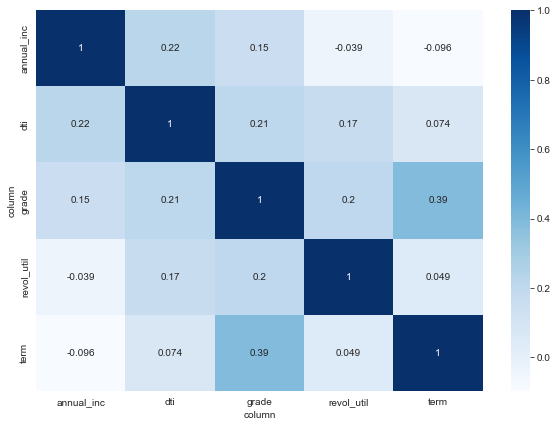

In [85]:
# 观察相关系数热力图
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap='Blues')

## 4. 模型训练

In [86]:
# 模型训练的数据集
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611782 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   term         611782 non-null  category
 1   grade        611782 non-null  category
 2   purpose      611782 non-null  category
 3   loan_status  611782 non-null  object  
 4   annual_inc   611782 non-null  category
 5   dti          611782 non-null  category
 6   pub_rec      611782 non-null  category
 7   revol_util   611782 non-null  category
dtypes: category(7), object(1)
memory usage: 13.4+ MB


In [87]:
# 提取对应的数据标签
labels = data.loc[:, 'loan_status']
labels.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [88]:
# 将标签值映射为0，1
labels = labels.map({'Fully Paid': 0, 'Charged Off': 1})
labels.head()

0    0
1    0
2    0
4    0
5    0
Name: loan_status, dtype: int64

In [89]:
# 观察违约比例
labels.sum() / len(labels)

0.21116508821769847

In [90]:
data_predictors.head()

column,annual_inc,dti,grade,revol_util,term
0,-0.136638,0.371945,-0.156626,0.151130,0.288954
1,0.004232,0.056013,-0.156626,0.347444,0.288954
2,0.004232,0.235194,0.479782,-0.099165,-0.711902
4,0.246406,-0.142428,-1.328782,-0.099165,-0.711902
5,-0.136638,0.235194,-0.156626,-0.099165,0.288954


In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(data_predictors, labels, test_size=0.2, random_state=42)

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [95]:
# 模型训练
LR = LogisticRegression(class_weight='balanced').fit(X_train, y_train)

In [96]:
# 对样本外数据进行预测
y_predict = LR.predict(X_train)
y_predict

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [97]:
# 样本内数据的混淆矩阵
pd.DataFrame(confusion_matrix(y_train, y_predict), columns=['predict_0', 'predict_1'], index=['real_0', 'real_1'])

,predict_0,predict_1
real_0,245592,140418
real_1,34523,68892


In [98]:
# 获取训练集数据的预测概率
y_predict_proba = LR.predict_proba(X_train)

(array([ 1299.,  7765., 20791., 29213., 13924., 12609.,  5361.,  2332.,
         3867., 14228., 14598., 22276., 18028., 20438., 16382., 14673.,
        11398., 15079., 20153., 17824., 19702., 19530., 16714., 13616.,
        15995., 13538., 14075., 14144., 11930.,  9387.,  7909.,  9650.,
         8190.,  8728.,  6471.,  6087.,  5609.,  3196.,  2203.,   513.]),
 array([0.1286174 , 0.14735529, 0.16609317, 0.18483106, 0.20356894,
        0.22230682, 0.24104471, 0.25978259, 0.27852048, 0.29725836,
        0.31599625, 0.33473413, 0.35347202, 0.3722099 , 0.39094779,
        0.40968567, 0.42842356, 0.44716144, 0.46589933, 0.48463721,
        0.50337509, 0.52211298, 0.54085086, 0.55958875, 0.57832663,
        0.59706452, 0.6158024 , 0.63454029, 0.65327817, 0.67201606,
        0.69075394, 0.70949183, 0.72822971, 0.7469676 , 0.76570548,
        0.78444337, 0.80318125, 0.82191913, 0.84065702, 0.8593949 ,
        0.87813279]),
 <BarContainer object of 40 artists>)

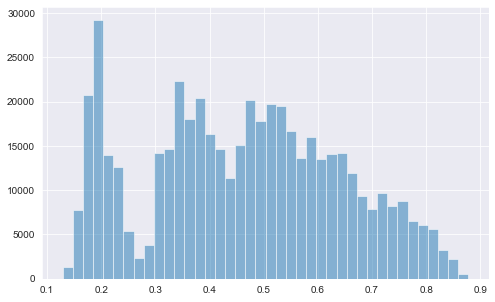

In [99]:
# 观察预测概率的分布情况
plt.hist(y_predict_proba[:,1], bins=40, alpha=0.5)

In [100]:
# 将权重系数与对应特征名称形成表格
coe = pd.DataFrame(LR.coef_.T, index=X_train.columns, columns=['coefficient'])
coe

,coefficient
column,
annual_inc,-0.587647
dti,-0.448437
grade,-0.832087
revol_util,-0.211187
term,-0.501808


In [101]:
score = LR.score(X_test, y_test)
print("准确率为:", score)

准确率为: 0.6436411484426718


## LR 模型表现

In [102]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [103]:
import matplotlib.pyplot as plt

In [104]:
# 使用模型对样本外数据进行预测
y_predict_test = LR.predict(X_test)

In [105]:
# 获得每个样本被分类为1的概率
y_predict_proba = LR.predict_proba(X_test)[:, 1]
y_predict_proba

array([0.28304218, 0.37402564, 0.20200018, ..., 0.2102513 , 0.57982738,
       0.5490123 ])

In [106]:
len(y_test)

122357

In [107]:
len(y_predict_proba)

122357

In [108]:
# 使用 roc_curve() 函数计算不同threshold下的 true_positive 和 false_positive
fpr, tpr, threshold = roc_curve(y_test, y_predict_proba, pos_label=1)

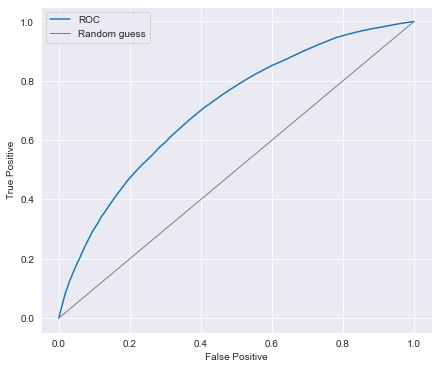

In [109]:
# 绘制 ROC 曲线
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1],[0, 1], 'grey', linewidth=1)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.legend(['ROC', 'Random guess'])

#### AUC 指标

In [110]:
# 计算 AUC
auc_value = auc(fpr, tpr)
auc_value

0.7078510315943836

#### KS 指标

In [111]:
# 计算 tpr 与 fpr 差值绝对值的最大值
ks = max(abs(tpr - fpr))
ks

0.3011780646016291

In [113]:
# 找到 KS 值对应的threshold
best_threshold = threshold[np.argmax(abs(tpr - fpr))]
best_threshold

## 最佳分类概率

0.4952615323118305

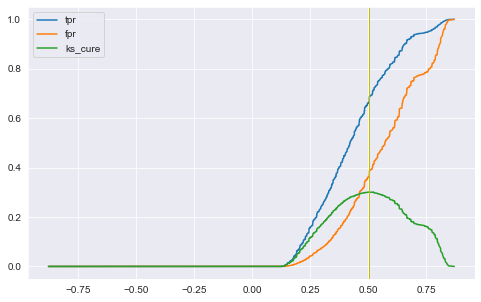

In [114]:
# 生成KS曲线
plt.plot(1 - threshold, tpr)
plt.plot(1 - threshold, fpr)
plt.plot(1 - threshold, tpr - fpr)
plt.axvline(1 - best_threshold, color='y', linewidth=1)
plt.legend(['tpr', 'fpr', 'ks_cure'])

## 5. 构建评分卡

In [115]:
from math import log

In [116]:
# 计算评分公式的系数
B = 20 / log(2)
A = 600 - B * log(30)
print(f'A = {A} \nB = {B}')

A = 501.8621880878296 
B = 28.85390081777927


In [117]:
data_predictors.head()

column,annual_inc,dti,grade,revol_util,term
0,-0.136638,0.371945,-0.156626,0.151130,0.288954
1,0.004232,0.056013,-0.156626,0.347444,0.288954
2,0.004232,0.235194,0.479782,-0.099165,-0.711902
4,0.246406,-0.142428,-1.328782,-0.099165,-0.711902
5,-0.136638,0.235194,-0.156626,-0.099165,0.288954


In [118]:
# 逻辑回归模型训练得到的特征系数
coe

,coefficient
column,
annual_inc,-0.587647
dti,-0.448437
grade,-0.832087
revol_util,-0.211187
term,-0.501808


In [119]:
# 计算所有样本的得分
scores = np.round(A - B * np.dot(data_predictors, coe), 0)
scores[:5]

array([[506.],
       [505.],
       [506.],
       [461.],
       [502.]])

(array([  228.,   403.,  1044.,  1558.,  2661.,  3437.,  4686.,  2212.,
         8037.,  5667.,  8921.,  3792., 15378.,  5587.,  9079.,  9210.,
        17846., 14919., 13403., 14663., 24041., 20054., 21953., 20510.,
        22314., 29150., 21861., 18566., 15177., 21642., 20168., 18228.,
        26152., 28962., 20969.,  9951., 10850.,  3185.,  1997.,  4251.,
         7208., 16987., 13527., 19842., 16275., 23889.,  6032.,  3711.,
          948.,   651.]),
 array([445.  , 447.24, 449.48, 451.72, 453.96, 456.2 , 458.44, 460.68,
        462.92, 465.16, 467.4 , 469.64, 471.88, 474.12, 476.36, 478.6 ,
        480.84, 483.08, 485.32, 487.56, 489.8 , 492.04, 494.28, 496.52,
        498.76, 501.  , 503.24, 505.48, 507.72, 509.96, 512.2 , 514.44,
        516.68, 518.92, 521.16, 523.4 , 525.64, 527.88, 530.12, 532.36,
        534.6 , 536.84, 539.08, 541.32, 543.56, 545.8 , 548.04, 550.28,
        552.52, 554.76, 557.  ]),
 <BarContainer object of 50 artists>)

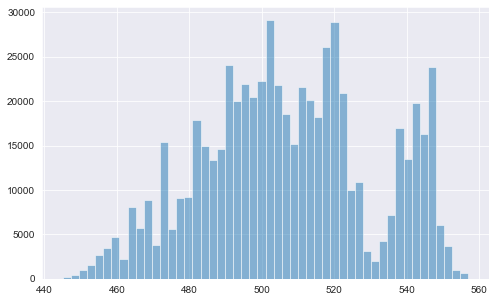

In [120]:
# 得分分布直方图
plt.hist(scores, bins=50, alpha=0.5)

### 5.1 生成评分卡

In [121]:
## WOE 填充表
data_predictors.head()

column,annual_inc,dti,grade,revol_util,term
0,-0.136638,0.371945,-0.156626,0.151130,0.288954
1,0.004232,0.056013,-0.156626,0.347444,0.288954
2,0.004232,0.235194,0.479782,-0.099165,-0.711902
4,0.246406,-0.142428,-1.328782,-0.099165,-0.711902
5,-0.136638,0.235194,-0.156626,-0.099165,0.288954


In [122]:
## 类别类型-处理表
data_classification.head()

,term,grade,purpose,loan_status,annual_inc,dti,pub_rec,revol_util
0,36 months,C,debt_consolidation,Fully Paid,"(30000.0, 60000.0]","(5.0, 10.0]","(-0.002, 0.9]","(19.0, 39.0]"
1,36 months,C,small_business,Fully Paid,"(60000.0, 90000.0]","(16.0, 21.0]","(-0.002, 0.9]","(-0.0, 19.0]"
2,60 months,B,home_improvement,Fully Paid,"(60000.0, 90000.0]","(10.0, 16.0]","(-0.002, 0.9]","(39.0, 58.0]"
4,60 months,F,major_purchase,Fully Paid,"(90000.0, 119900.0]","(21.0, 27.0]","(-0.002, 0.9]","(58.0, 77.0]"
5,36 months,C,debt_consolidation,Fully Paid,"(30000.0, 60000.0]","(10.0, 16.0]","(-0.002, 0.9]","(58.0, 77.0]"


In [123]:
data_classification.dtypes

term           category
grade          category
purpose        category
loan_status      object
annual_inc     category
dti            category
pub_rec        category
revol_util     category
dtype: object

In [124]:
# 计算每个特征分组的对应分数
group_score = SY_Table.reset_index(1)
group_score = group_score.dropna()
group_score

,group,WoE
column,,
annual_inc,"(-300.0, 30000.0]",-0.240706
annual_inc,"(30000.0, 60000.0]",-0.136638
annual_inc,"(60000.0, 90000.0]",0.004232
annual_inc,"(90000.0, 119900.0]",0.246406
annual_inc,"(119900.0, 149900.0]",0.246406
annual_inc,"(149900.0, 179900.0]",0.246406
annual_inc,"(179900.0, 209900.0]",0.246406
annual_inc,"(209900.0, 239900.0]",0.246406
annual_inc,"(239900.0, 269900.0]",0.246406


In [125]:
coe.coefficient

column
annual_inc   -0.587647
dti          -0.448437
grade        -0.832087
revol_util   -0.211187
term         -0.501808
Name: coefficient, dtype: float64

In [126]:
SY_Table

column      group               
annual_inc  (-300.0, 30000.0]      -0.240706
            (30000.0, 60000.0]     -0.136638
            (60000.0, 90000.0]      0.004232
            (90000.0, 119900.0]     0.246406
            (119900.0, 149900.0]    0.246406
            (149900.0, 179900.0]    0.246406
            (179900.0, 209900.0]    0.246406
            (209900.0, 239900.0]    0.246406
            (239900.0, 269900.0]    0.246406
            (269900.0, 299800.0]    0.606352
dti         (-1.0, 5.0]             0.371945
            (5.0, 10.0]             0.371945
            (10.0, 16.0]            0.235194
            (16.0, 21.0]            0.056013
            (21.0, 27.0]           -0.142428
            (27.0, 32.0]           -0.340777
            (32.0, 38.0]           -0.525675
            (38.0, 43.0]           -0.525675
            (43.0, 49.0]           -0.525675
            (49.0, 54.0]           -0.392463
grade       A                       1.407927
            B         

In [127]:
group_score

,group,WoE
column,,
annual_inc,"(-300.0, 30000.0]",-0.240706
annual_inc,"(30000.0, 60000.0]",-0.136638
annual_inc,"(60000.0, 90000.0]",0.004232
annual_inc,"(90000.0, 119900.0]",0.246406
annual_inc,"(119900.0, 149900.0]",0.246406
annual_inc,"(149900.0, 179900.0]",0.246406
annual_inc,"(179900.0, 209900.0]",0.246406
annual_inc,"(209900.0, 239900.0]",0.246406
annual_inc,"(239900.0, 269900.0]",0.246406


In [128]:
# 将对应特征的系数填入 group_score 表中
group_score['coe'] = group_score.index.map(coe.coefficient)
group_score

,group,WoE,coe
column,,,
annual_inc,"(-300.0, 30000.0]",-0.240706,-0.587647
annual_inc,"(30000.0, 60000.0]",-0.136638,-0.587647
annual_inc,"(60000.0, 90000.0]",0.004232,-0.587647
annual_inc,"(90000.0, 119900.0]",0.246406,-0.587647
annual_inc,"(119900.0, 149900.0]",0.246406,-0.587647
annual_inc,"(149900.0, 179900.0]",0.246406,-0.587647
annual_inc,"(179900.0, 209900.0]",0.246406,-0.587647
annual_inc,"(209900.0, 239900.0]",0.246406,-0.587647
annual_inc,"(239900.0, 269900.0]",0.246406,-0.587647


In [129]:
group_score.dtypes

group     object
WoE      float64
coe      float64
dtype: object

In [130]:
# 计算每个分组的得分
group_score['score'] = -group_score.WoE * group_score.coe * B

In [131]:
group_score.dropna(inplace = True)

In [132]:
# 四舍五入 score
group_score.score = round(group_score.score.astype("float"),0)

In [133]:
group_score.head()

,group,WoE,coe,score
column,,,,
annual_inc,"(-300.0, 30000.0]",-0.240706,-0.587647,-4.0
annual_inc,"(30000.0, 60000.0]",-0.136638,-0.587647,-2.0
annual_inc,"(60000.0, 90000.0]",0.004232,-0.587647,0.0
annual_inc,"(90000.0, 119900.0]",0.246406,-0.587647,4.0
annual_inc,"(119900.0, 149900.0]",0.246406,-0.587647,4.0


### 5.2 评分卡使用

In [134]:
Group_label = group_score.group.to_list()
Score_label = group_score.score.to_list()

In [141]:
Table_score_final = data_classification.replace(Group_label,Score_label)

In [143]:
Table_score_final = Table_score_final.iloc[:,[0,1,3,4,5,7]]

In [144]:
# 批量计算样本评分
Table_score_final['score'] = np.round(A + Table_score_final.sum(axis=1), 0)
Table_score_final.head()

C:\Users\weiji\AppData\Local\Temp\ipykernel_28980\168923814.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Table_score_final['score'] = np.round(A + Table_score_final.sum(axis=1), 0)


,term,grade,loan_status,annual_inc,dti,revol_util,score
0,4.0,-4.0,Fully Paid,-2.0,5.0,1.0,506.0
1,4.0,-4.0,Fully Paid,0.0,1.0,2.0,505.0
2,-10.0,12.0,Fully Paid,0.0,3.0,-1.0,506.0
4,-10.0,-32.0,Fully Paid,4.0,-2.0,-1.0,461.0
5,4.0,-4.0,Fully Paid,-2.0,3.0,-1.0,502.0


In [145]:
Table_score_final[Table_score_final.loan_status == 'Charged Off'].score.mean()

493.4249034345561

In [146]:
Table_score_final[Table_score_final.loan_status == 'Fully Paid'].score.mean()

510.6826635170277

## 5. 评分卡的使用和优化

1. 尝试不同的特征值组合训练模型
2. 优化数据分箱方法，采用最优分箱等
3. 优化模型决策分界点（threshold）